# Finding the Best Markets to Advertise In an E-learning Product

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exploring the Data

We the data from [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969?gi=a7a23fb12d5d). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development.

In [2]:
data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

In [3]:
data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(2882, 136)

### Checking if the sample we have is representative for our population of interest

In [5]:
data['JobRoleInterest'].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                                                                                                                                  12.015810
  Front-End Web Developer                                                                                                                                                                                                                                  4.426877
  Data Scientist                                                                                                                                                                                                                                           2.371542
  Mobile Developer                                                                                                                                                                                                          

According to this data, most people in this sample are interested in Web developement! After Web development and data science, mobile development is the next poular area of interest.

In [6]:
interests = data['JobRoleInterest'].dropna().str.split(',')
interests.head()

1                           [Full-Stack Web Developer]
2    [  Front-End Web Developer,  Back-End Web Deve...
3    [  Front-End Web Developer,  Full-Stack Web De...
4    [Full-Stack Web Developer,  Information Securi...
6                           [Full-Stack Web Developer]
Name: JobRoleInterest, dtype: object

In [7]:
n_subjects_of_interest = interests.apply(lambda x: len(x))
n_subjects_of_interest.value_counts(normalize = True).sort_index() * 100

1     27.272727
2     12.569170
3     18.023715
4     16.521739
5     12.332016
6      6.719368
7      3.320158
8      1.185771
9      1.106719
10     0.474308
11     0.237154
12     0.237154
Name: JobRoleInterest, dtype: float64

%27 of participants are interested in only one subject of interest, while around %12 and %18 are interested in learning two or three subjects, respectively.

In [8]:
web_or_mobile_development = data['JobRoleInterest'].dropna().str.contains('Web Developer|Mobile Developer')
frequency_table = web_or_mobile_development.value_counts(normalize = True) * 100
frequency_table

True     87.98419
False    12.01581
Name: JobRoleInterest, dtype: float64

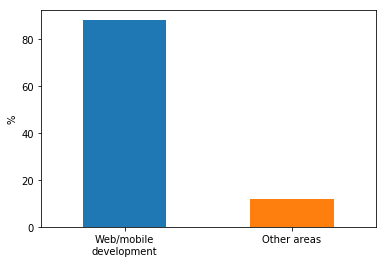

In [9]:
frequency_table.plot.bar()
plt.ylabel('%')
plt.xticks([0,1],['Web/mobile\ndevelopment', 'Other areas'], rotation = 0)
plt.show()

The majarotiy of participants are interested in learning Web or mobile development. **Therefore the sample data is indeed representive of the population we are interested in**.

### Locations of Interest

We start by finding out where the new coders are located, and what are the densities for each location.

In [10]:
survey_data = data[data['JobRoleInterest'].notnull()].copy()

In [11]:
survey_data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
abs_freq = survey_data['CountryLive'].value_counts()
rel_freq = survey_data['CountryLive'].value_counts(normalize = True) * 100

In [13]:
pd.DataFrame(data = {'Absolute frequency': abs_freq,'Relative Frequency': rel_freq})

,Absolute frequency,Relative Frequency
United States of America,620,50.000000
India,105,8.467742
United Kingdom,64,5.161290
Canada,49,3.951613
Germany,26,2.096774
Poland,24,1.935484
Brazil,23,1.854839
Australia,19,1.532258
Romania,14,1.129032
Russia,13,1.048387


Half of the participants live in the US. India, U.K, and Canada are the other potential markets.

### How much money the participants are willing to spend on learning?

In [14]:
survey_data['MonthsProgramming'].replace(0,1, inplace = True)

In [15]:
survey_data['money_per_month'] = survey_data['MoneyForLearning'] / survey_data['MonthsProgramming']
survey_data['money_per_month'].isnull().sum()

122

In [16]:
survey_data['money_per_month'].head()

1     13.333333
2    200.000000
3      0.000000
4      0.000000
6      0.000000
Name: money_per_month, dtype: float64

In [17]:
survey_data = survey_data[survey_data['money_per_month'].notnull()]
survey_data = survey_data[survey_data['CountryLive'].notnull()]

In [18]:
survey_data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,200.000000
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.000000
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [19]:
survey_data.shape

(1124, 137)

In [20]:
survey_data['CountryLive'].value_counts().head()

United States of America    582
India                        92
United Kingdom               58
Canada                       45
Germany                      23
Name: CountryLive, dtype: int64

In [21]:
mean_by_country = survey_data.groupby('CountryLive').mean()
mean_by_country['money_per_month'][['United States of America','India', 'United Kingdom','Canada']]

CountryLive
United States of America    262.466988
India                       119.467205
United Kingdom               18.921319
Canada                       35.808258
Name: money_per_month, dtype: float64

United States and India have the highest average value spent per month by a student.

### Visualizing the money spent per country

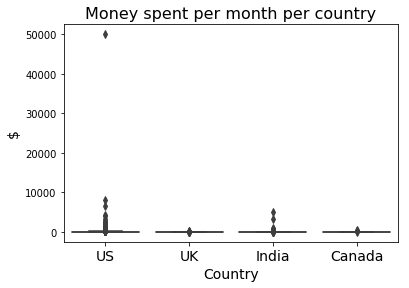

In [22]:
survey_data_4_countries = survey_data[survey_data['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

sns.boxplot(y = 'money_per_month', x = 'CountryLive', data = survey_data_4_countries)
plt.title('Money spent per month per country', fontsize = 16)
plt.ylabel('$', fontsize = 14)
plt.xlabel('Country', fontsize = 14)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'], fontsize = 14)
plt.show()

### Removing the outliers

In [23]:
survey_data = survey_data[survey_data['money_per_month'] < 20000]

In [24]:
mean_by_country = survey_data.groupby('CountryLive').mean()
mean_by_country ['money_per_month'][['United States of America','India', 'United Kingdom','Canada']]

CountryLive
United States of America    176.860219
India                       119.467205
United Kingdom               18.921319
Canada                       35.808258
Name: money_per_month, dtype: float64

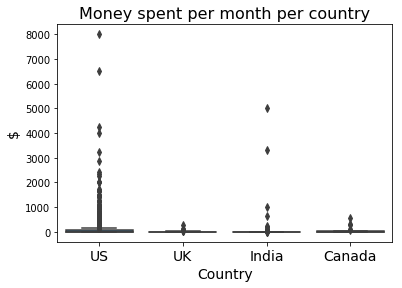

In [25]:
survey_data_4_countries = survey_data[survey_data['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

sns.boxplot(y = 'money_per_month', x = 'CountryLive', data = survey_data_4_countries)
plt.title('Money spent per month per country', fontsize = 16)
plt.ylabel('$', fontsize = 14)
plt.xlabel('Country', fontsize = 14)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'], fontsize = 14)
plt.show()

In [26]:
survey_data_4_countries.shape

(776, 137)

In [27]:
india_outliers = survey_data_4_countries[(survey_data_4_countries['CountryLive'] == 'India') & (survey_data_4_countries['money_per_month'] >= 2000)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333


In [28]:
survey_data_4_countries = survey_data_4_countries.drop(india_outliers.index)

In [29]:
survey_data_4_countries.shape

(774, 137)

In [30]:
us_outliers = survey_data_4_countries[(survey_data_4_countries['CountryLive'] == 'United States of America') & (survey_data_4_countries['money_per_month'] >= 5000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.0
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.0


In [31]:
survey_data_4_countries = survey_data_4_countries.drop(us_outliers.index)

In [32]:
survey_data_4_countries.shape

(772, 137)

In [33]:
survey_data_4_countries.groupby('CountryLive').mean()['money_per_month']

CountryLive
Canada                       35.808258
India                        29.529439
United Kingdom               18.921319
United States of America    152.427957
Name: money_per_month, dtype: float64

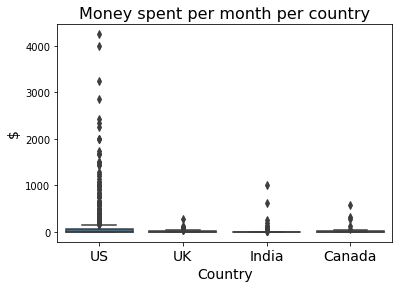

In [34]:
sns.boxplot(y = 'money_per_month', x = 'CountryLive', data = survey_data_4_countries)
plt.title('Money spent per month per country', fontsize = 16)
plt.ylabel('$', fontsize = 14)
plt.xlabel('Country', fontsize = 14)
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'], fontsize = 14)
plt.show()

### Choosing the best 2 markets

In [36]:
survey_data_4_countries['CountryLive'].value_counts(normalize = True) * 100

United States of America    75.000000
India                       11.658031
United Kingdom               7.512953
Canada                       5.829016
Name: CountryLive, dtype: float64

**Clearly, United States must be chosen as the first target. On the other United Kindom is the last favorate target as it has the minimum number of participants and the least amount of money spent per month among the final 4 countries of interest. Finally the second target could be either Canada, due to the higher amount of money the participants are willing to spent per month, or India, because of the higher number of potential learners.**